# Training model

This was done in a colab environment to get gpu acceleration

## Loading Data

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory
import zipfile

In [18]:
filePath = "/content/drive/MyDrive/vehicle similarity data.zip"

with zipfile.ZipFile(filePath, 'r') as f:
  f.extractall('/content/')

In [19]:
trainData = image_dataset_from_directory('/content/augmented data/train', label_mode='categorical')
validData = image_dataset_from_directory('/content/augmented data/valid', label_mode='categorical')

Found 30060 files belonging to 5 classes.
Found 6058 files belonging to 5 classes.


In [20]:
trainData.class_names

['bikes', 'cars', 'cycles', 'scooters', 'trucks']

In [21]:
len(validData.class_names)

5

## Creating Model

In [22]:
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [23]:
# from keras.applications.vgg16 import VGG16

# # Load the VGG16 model without the fully connected layers at the top
# preTrained = VGG16(weights='imagenet', include_top=False)

# # summarize the model
# preTrained.summary()


In [24]:
# from keras.layers import GlobalMaxPool2D
# from keras.models import Model

In [25]:
# # Add a global spatial average pooling layer
# x = preTrained.output
# x = GlobalMaxPool2D()(x)

# # Add a fully connected layer
# x = Dense(512, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# predictionLayer = Dense(5, activation='softmax')(x)

In [26]:
# model = Model(inputs=preTrained.input, outputs=predictionLayer)

In [27]:
model = Sequential([
    Conv2D(16, 3, 1, input_shape=(256, 256, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.25),

    Conv2D(32, 3, 1, activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(16, 3, 1, activation='relu'),
    MaxPool2D(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.15),
    Dense(64, activation='relu'),
    Dropout(0.4),

    Dense(5, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 62, 62, 32)       

In [29]:
from keras.losses import CategoricalCrossentropy

In [30]:
model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])

## Training Model

In [31]:
hist = model.fit(trainData, epochs=30, validation_data=validData)

Epoch 1/30
940/940 [==============================] - 71s 72ms/step - loss: 7.3743 - accuracy: 0.2221 - val_loss: 1.6092 - val_accuracy: 0.2176
Epoch 2/30
940/940 [==============================] - 71s 75ms/step - loss: 1.5986 - accuracy: 0.2506 - val_loss: 1.6282 - val_accuracy: 0.2194
Epoch 3/30
940/940 [==============================] - 64s 68ms/step - loss: 1.5772 - accuracy: 0.2722 - val_loss: 1.6288 - val_accuracy: 0.2605
Epoch 4/30
940/940 [==============================] - 68s 72ms/step - loss: 1.5362 - accuracy: 0.3091 - val_loss: 1.5338 - val_accuracy: 0.3361
Epoch 5/30
940/940 [==============================] - 64s 68ms/step - loss: 1.4315 - accuracy: 0.3811 - val_loss: 1.4367 - val_accuracy: 0.3963
Epoch 6/30
940/940 [==============================] - 64s 68ms/step - loss: 1.2777 - accuracy: 0.4565 - val_loss: 1.2809 - val_accuracy: 0.4871
Epoch 7/30
940/940 [==============================] - 62s 66ms/step - loss: 1.1306 - accuracy: 0.5399 - val_loss: 1.2233 - val_accuracy:

In [32]:
model.save('carSimilarity.h5')
model.save('/content/drive/MyDrive/carSimilarity.h5')

In [35]:
import matplotlib.pyplot as plt

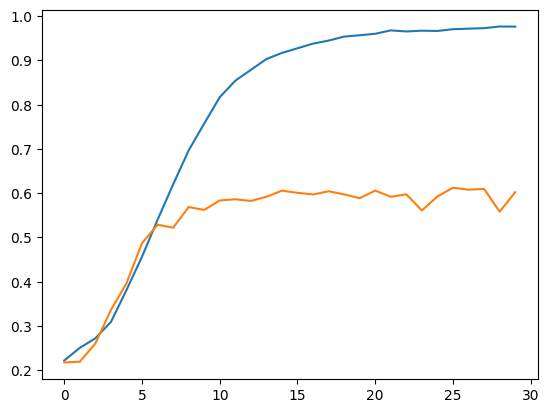

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

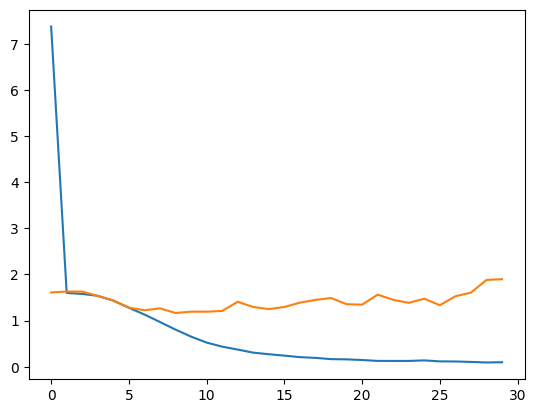

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

This model is clearly overfitted trash

## Creating Model 2

In [69]:
dir(keras.applications)

['ConvNeXtBase',
 'ConvNeXtLarge',
 'ConvNeXtSmall',
 'ConvNeXtTiny',
 'ConvNeXtXLarge',
 'DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'EfficientNetV2B0',
 'EfficientNetV2B1',
 'EfficientNetV2B2',
 'EfficientNetV2B3',
 'EfficientNetV2L',
 'EfficientNetV2M',
 'EfficientNetV2S',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'RegNetX002',
 'RegNetX004',
 'RegNetX006',
 'RegNetX008',
 'RegNetX016',
 'RegNetX032',
 'RegNetX040',
 'RegNetX064',
 'RegNetX080',
 'RegNetX120',
 'RegNetX160',
 'RegNetX320',
 'RegNetY002',
 'RegNetY004',
 'RegNetY006',
 'RegNetY008',
 'RegNetY016',
 'RegNetY032',
 'RegNetY040',
 'RegNetY064',
 'RegNetY080',
 'RegNetY120',
 'RegNetY160',
 'RegNetY320',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'Re

In [70]:
from keras.applications import MobileNet

In [71]:
preTrained = MobileNet(weights='imagenet', include_top=False)

In [72]:
preTrained.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                         

In [73]:
from keras.layers import GlobalMaxPool2D
from keras.models import Model

In [74]:
# Add a global spatial average pooling layer
x = preTrained.output
x = GlobalMaxPool2D()(x)

# Add a fully connected layer
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictionLayer = Dense(5, activation='softmax')(x)

In [75]:
model2 = Model(inputs=preTrained.input, outputs=predictionLayer)

In [76]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

In [77]:
model2.compile(optimizer='adam', metrics=['accuracy'], loss=CategoricalCrossentropy())

In [78]:
model2.fit(trainData, epochs=5, validation_data=validData)

Epoch 1/5
940/940 [==============================] - 207s 159ms/step - loss: 0.4900 - accuracy: 0.8408 - val_loss: 0.4944 - val_accuracy: 0.8437
Epoch 2/5
940/940 [==============================] - 148s 158ms/step - loss: 0.1770 - accuracy: 0.9404 - val_loss: 0.6913 - val_accuracy: 0.8169
Epoch 3/5
940/940 [==============================] - 148s 157ms/step - loss: 0.1356 - accuracy: 0.9549 - val_loss: 0.4854 - val_accuracy: 0.8694
Epoch 4/5
940/940 [==============================] - 148s 158ms/step - loss: 0.1134 - accuracy: 0.9624 - val_loss: 0.3724 - val_accuracy: 0.8854
Epoch 5/5
940/940 [==============================] - 147s 157ms/step - loss: 0.0967 - accuracy: 0.9692 - val_loss: 0.4520 - val_accuracy: 0.8618


In [82]:
model.save('drive/MyDrive/carSimilarityV1.h5')

In [81]:
model2.save('drive/MyDrive/carSimilarityV2.h5')
model2.save('carSimilarityV2.h5')

In [ ]:
# Created 2 models